### Import the dataset

In [ ]:
# import kagglehub

# # Download dataset using kagglehub
# path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

# # Print out the path to verify the location
# print("Path to dataset files:", path)

# # If needed, move the downloaded dataset to the target folder
# import shutil

# # Target folder
# desired_folder = r'C:\Users\Tammy\Documents\GitHub\multimodal_stockprice_prediction\data\benchmark data'

# # Move files (if necessary, after download)
# shutil.move(path, desired_folder)
# print(f"Dataset moved to: {desired_folder}")


In [ ]:
# import csv
# import os

# def convert_txt_to_csv(input_file_path, output_file_path, delimiter='@'):
#     """
#     Convert a .txt file to a .csv file. Assumes each line in the .txt file is a 'sentence<delimiter>label' format.

#     Args:
#     - input_file_path: str, the path to the input .txt file.
#     - output_file_path: str, the path where the output .csv file will be saved.
#     - delimiter: str, the character used to separate the headline from the label.
#     """
#     if not os.path.exists(input_file_path):
#         print(f"Error: The file {input_file_path} does not exist.")
#         return

#     with open(input_file_path, 'r') as report:
#         reader = report.readlines()

#         # Open the .csv file for writing
#         with open(output_file_path, 'w', newline='', encoding='utf-8') as csvfile:
#             writer = csv.writer(csvfile)
            
#             # Write custom header
#             writer.writerow(['headline', 'label'])

#             # Process each line in the file
#             for line in reader:
#                 # Split line by the delimiter, handle possible formatting errors
#                 parts = line.strip().split(delimiter)

#                 if len(parts) == 2:
#                     writer.writerow(parts)
#                 else:
#                     print(f"Skipping invalid line: {line.strip()}")

#     print(f"Data has been successfully written to {output_file_path}")


# # Example Usage:
# # Generalize the paths for any dataset
# input_path = r'C:\Users\Tammy\Documents\GitHub\multimodal_stockprice_prediction\data\benchmark data\5\FinancialPhraseBank\Sentences_AllAgree.txt'
# output_path = r'C:\Users\Tammy\Documents\GitHub\multimodal_stockprice_prediction\data\benchmark data\5\FinancialPhraseBank\Sentences_AllAgree.csv'

# # Call the function to process the file
# convert_txt_to_csv(input_path, output_path)


Data has been successfully written to C:\Users\Tammy\Documents\GitHub\multimodal_stockprice_prediction\data\benchmark data\5\FinancialPhraseBank\Sentences_AllAgree.csv


## Exploring Data

In [ ]:
#>=50% of annotators agreed on the financial sentiment 
from pathlib import Path
import pandas as pd

# Load the CSV file with the specified encoding and column names
df = pd.read_csv('all-data.csv',encoding='windows-1252', header=None, names=['label', 'headline'])

# Check the first few rows of the data
df.head()


,label,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
import re
# Cleaning function
def clean_text(text):
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
#clean headlines
df['headline'] = df['headline'].apply(clean_text)


      label                                           headline
0   neutral  according to gran the company has no plans to ...
1   neutral  technopolis plans to develop in stages an area...
2  negative  the international electronic industry company ...
3  positive  with the new production plant the company woul...
4  positive  according to the company s updated strategy fo...


C:\Users\Tammy\AppData\Local\Temp\ipykernel_18652\130161633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


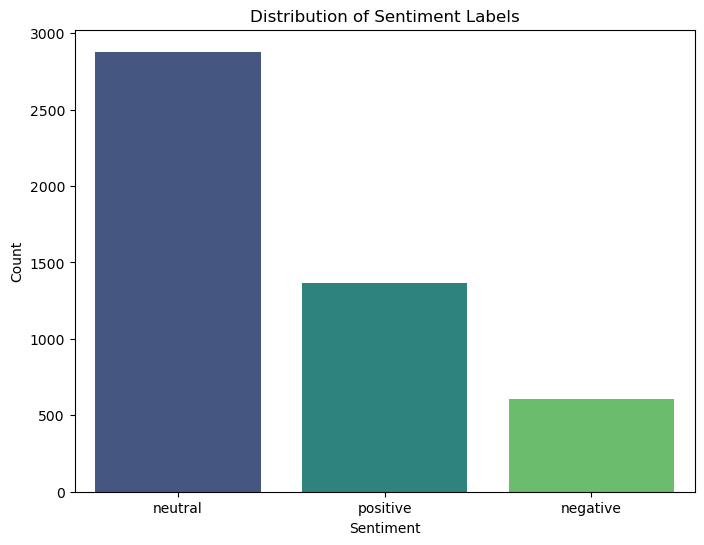

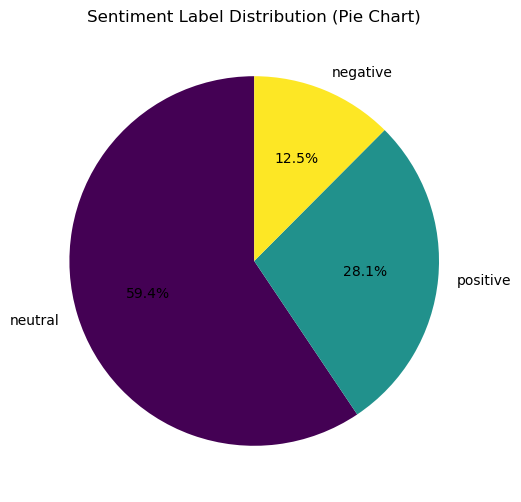

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If your dataset is in a CSV file, use pd.read_csv('your_file.csv') to load the data.

# Let's check the first few rows to understand the structure of the data
print(df.head())

# 1. Count the distribution of sentiments
sentiment_counts = df['label'].value_counts()

# 2. Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 3. Pie Chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=False)
plt.title("Sentiment Label Distribution (Pie Chart)")
plt.ylabel('')  # Remove the ylabel for a cleaner look
plt.show()


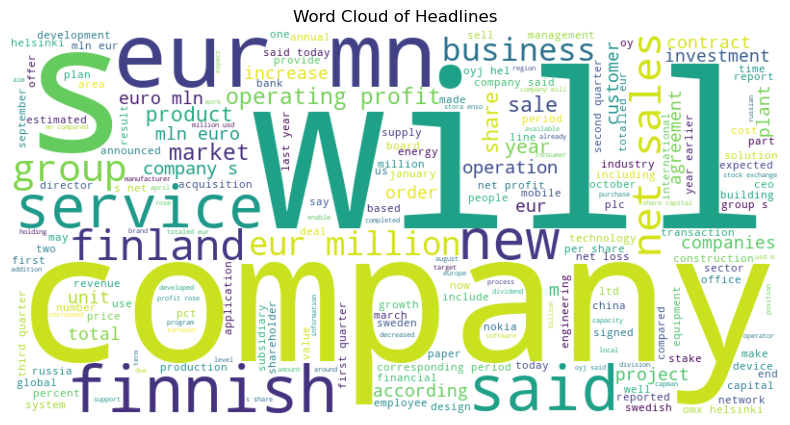

In [ ]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

# Combine all the headlines into a single string
text = " ".join(headline for headline in df['headline'])

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=STOPWORDS,   # Remove common stopwords
    width=800, 
    height=400, 
    background_color="white"
).generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # No axes for a cleaner look
plt.title("Word Cloud of Headlines")
plt.show()


## Average Length of Dataset

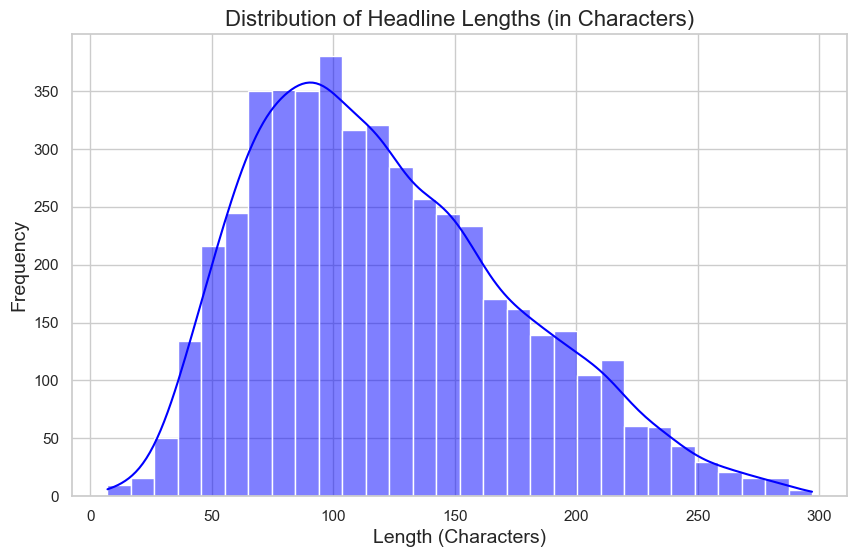

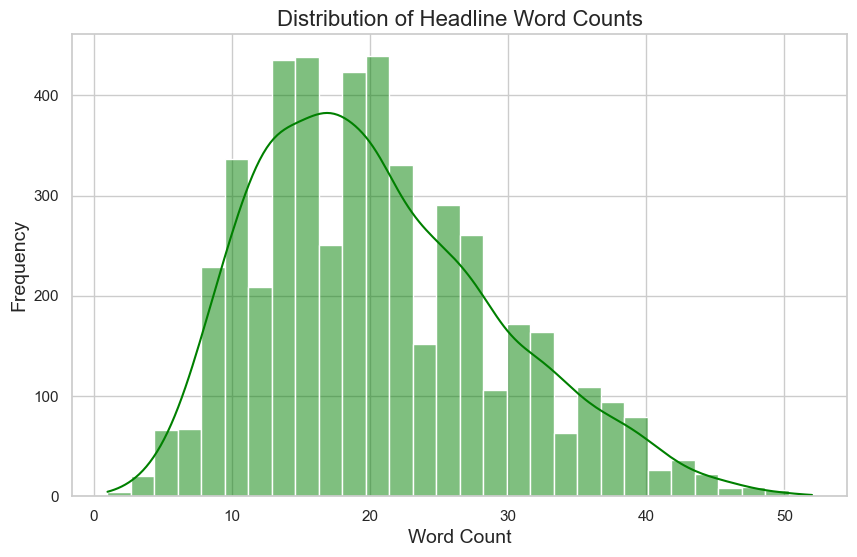

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each headline in characters
df['headline_length'] = df['headline'].apply(len)

# Calculate the word count for each headline
df['word_count'] = df['headline'].apply(lambda x: len(x.split()))

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting the distribution of headline lengths (in characters)
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['headline_length'], kde=True, color='blue', bins=30)  # Histogram with KDE
plt.title("Distribution of Headline Lengths (in Characters)", fontsize=16)
plt.xlabel("Length (Characters)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

# Plotting the distribution of word counts in headlines
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['word_count'], kde=True, color='green', bins=30)  # Histogram with KDE
plt.title("Distribution of Headline Word Counts", fontsize=16)
plt.xlabel("Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()
